In [3]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sn
import theano 
from theano import tensor as T

import sys
sys.path.append("../")
from global_utilities import LoT_indices_to_operators

In [6]:
# get minimal formulas length
with open('../data/lengths_data.npy', 'rb') as openfile:
    lengths = np.load(openfile)

In [7]:
NUM_PROPERTIES = 4
LoTs = LoT_indices_to_operators()

categories = np.array([
    [int(a) for a in f'{n:0{2**NUM_PROPERTIES}b}']
    for n in range(0, 2**(2**NUM_PROPERTIES))
])

datasize = 11
data = np.zeros(16, dtype=int)
data[np.random.randint(0, 16, size=datasize)] = 1

Text(0, 0.5, 'Average length of minimal formulas')

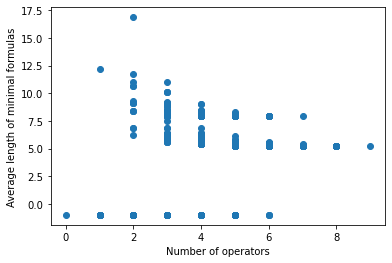

In [17]:
plt.scatter(
    LoTs.values.sum(axis=1),
    lengths.mean(axis=1)
)

plt.xlabel('Number of operators')
plt.ylabel('Average length of minimal formulas')

In [8]:
%load_ext line_profiler

In [220]:
%lprun \
-f run_simulation_log \
-f calculate_logp_accept_object_marginal \
-f calculate_logp_LoT_given_behaviour \
run_simulation_log(datasize=0, lengths_full=lengths, LoTs_full=LoTs.values, categories=categories, temp=3, n_participants=1)

<ipython-input-216-121a7da585b8>:35: RuntimeWarning: divide by zero encountered in log
  array = np.log(categories[None]) + logp_category_given_data[:,:,None]


Timer unit: 1e-07 s

Total time: 16.0533 s
File: <ipython-input-216-121a7da585b8>
Function: calculate_logp_accept_object_marginal at line 29

Line #      Hits         Time  Per Hit   % Time  Line Contents
    29                                           def calculate_logp_accept_object_marginal(categories, logp_category_given_data):
    30                                               # get marginal probability that the participant will accept each object
    31                                               # as belonging to the unobserved category
    32                                               # given each possible LoT.
    33                                               # For each LoT, sum across categories 
    34                                               # (p_category * indicator function of object for that category)
    35         1   20525843.0 20525843.0     12.8      array = np.log(categories[None]) + logp_category_given_data[:,:,None]
    36         1  140006534.0 1

Parameters are:

1. datasize 
    - (I dont think it makes sense to do it at the level of specific shown data)
    - Between 0 and 15 (included)
    - Could give a few different values, e.g. 0, 1, 5, 10, 15
2. n_participants
    - 1 or greater
    - Within realistic numbers, say up to 1k participants?
    - Could give a few values for participant parameter, e.g. 1, 5, 10, 30, 60, 120, 250, 500, 1000
3. temp
    - Greater than 0
    - Could give a few values, like 0.5, 1, 3, 6
4. index of true LoT
    - Takes on 306 values (one for every distinguishable LoT)
5. Repetitions with same parameter combo
    - Also called "number of experiments"
    - I am interested in the measures aggregated across experiments
    - I can just fix it to a value, e.g. 10

In [318]:
5 * 4 * 9 

180

In [229]:
results = run_simulation_log(
    datasize=4, 
    n_participants=10,
    lengths_full=lengths, 
    LoTs_full=LoTs.values, 
    categories=categories, 
    temp=3, 
    true_LoT=LoTs.iloc[20].values[None], 
#     data=data
)

<ipython-input-228-f4303b3b26b7>:35: RuntimeWarning: divide by zero encountered in log
  array = np.log(categories[None]) + logp_category_given_data[:,:,None]
<ipython-input-228-f4303b3b26b7>:58: RuntimeWarning: invalid value encountered in log
  np.log(-np.expm1(logp_accept_object_marginal))


<BarContainer object of 512 artists>

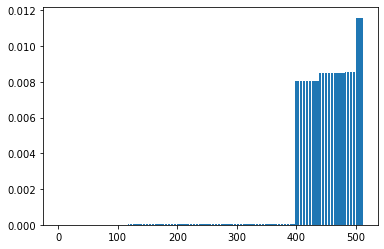

In [461]:
plt.bar(x=np.arange(len(results[1])), height=np.sort(np.exp(results[1])))

In [70]:
for i in np.argsort(np.exp(results[1])):
    print(i, np.exp(results[1])[i])

0 0.0
156 0.0
158 0.0
160 0.0
168 0.0
176 0.0
184 0.0
154 0.0
385 0.0
192 0.0
194 0.0
196 0.0
198 0.0
200 0.0
202 0.0
474 0.0
152 0.0
150 0.0
148 0.0
80 0.0
88 0.0
90 0.0
128 0.0
129 0.0
130 0.0
132 0.0
134 0.0
136 0.0
137 0.0
138 0.0
140 0.0
142 0.0
144 0.0
146 0.0
204 0.0
206 0.0
208 0.0
210 0.0
440 0.0
432 0.0
304 0.0
424 0.0
312 0.0
416 0.0
410 0.0
408 0.0
400 0.0
398 0.0
396 0.0
394 0.0
393 0.0
392 0.0
386 0.0
450 0.0
78 0.0
296 0.0
456 0.0
212 0.0
214 0.0
216 0.0
218 0.0
220 0.0
222 0.0
256 0.0
257 0.0
462 0.0
264 0.0
265 0.0
460 0.0
272 0.0
280 0.0
458 0.0
288 0.0
76 0.0
384 0.0
74 0.0
1 0.0
14 0.0
32 0.0
40 0.0
16 0.0
12 0.0
66 0.0
64 0.0
10 0.0
9 0.0
2 0.0
8 0.0
26 0.0
24 0.0
72 0.0
48 0.0
56 0.0
18 6.034077119449286e-08
4 1.192382867059653e-07
82 1.3583899255060286e-07
68 2.4282706950351637e-07
133 1.8333011163710817e-06
197 1.8333011163710817e-06
5 2.0168832224579577e-06
69 2.0168832224579577e-06
17 5.8971164297336475e-06
141 2.9815264934895984e-05
205 2.9815264934895984e-05